### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [2]:
df = pd.read_csv("world_population.csv")
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


###  EDA

In [3]:
df.shape

(234, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country                      234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [5]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country                        0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

### Statistical analysis

In [6]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


In [7]:
df["population"]=df["2022 Population"]+df["2020 Population"]+df["2015 Population"]+df["2010 Population"]+df["2000 Population"]+df["1990 Population"]+df["1980 Population"]+df["1970 Population"]

In [8]:
df[['Continent','population']].groupby('Continent').sum()

,population
Continent,
Africa,7347810642
Asia,29788655017
Europe,5760954646
North America,3898701206
Oceania,266845137
South America,2756076156


### Top 10 countries

In [9]:
top_countries = df.nlargest(10,['population'])
top_countries

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,population
41,1,CHN,China,Beijing,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88,9815434171
92,2,IND,India,New Delhi,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77,8561455951
221,3,USA,United States,"Washington, D.C.",North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24,2263973125
93,4,IDN,Indonesia,Jakarta,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45,1710105237
27,7,BRA,Brazil,Brasilia,South America,215313498,213196304,205188205,196353492,175873720,150706446,122288383,96369875,8515767,25.2841,1.0046,2.70,1375289923
156,5,PAK,Pakistan,Islamabad,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96,1278144321
171,9,RUS,Russia,Moscow,Europe,144713314,145617329,144668389,143242599,146844839,148005704,138257420,130093010,17098242,8.4636,0.9973,1.81,1141442604
149,6,NGA,Nigeria,Abuja,Africa,218541212,208327405,183995785,160952853,122851984,95214257,72951439,55569264,923768,236.5759,1.0241,2.74,1118404199
16,8,BGD,Bangladesh,Dhaka,Asia,171186372,167420951,157830000,148391139,129193327,107147651,83929765,67541860,147570,1160.0350,1.0108,2.15,1032641065
102,11,JPN,Japan,Tokyo,Asia,123951692,125244761,127250933,128105431,126803861,123686321,117624196,105416839,377930,327.9753,0.9947,1.55,978084034


Text(0.5, 0, 'World population (%)')

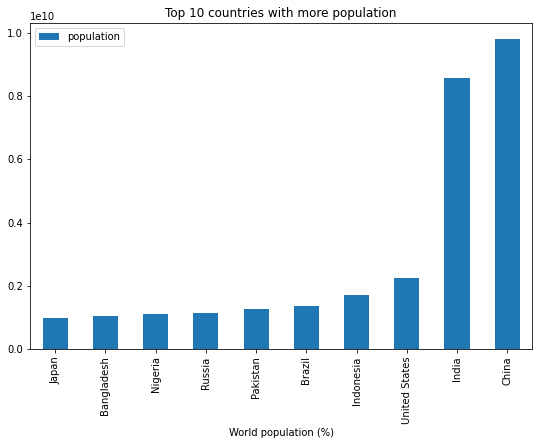

In [12]:
top_countries.sort_values('population', inplace=True)
top_countries.plot(kind='bar',x="Country",y="population",figsize=(9,6))
plt.title("Top 10 countries with more population")
plt.xlabel("World population (%)")

### Top 10 smallest country

In [13]:
top_smallest= df.nsmallest(10,['Area (km²)']).sort_values(by='Area (km²)',ascending=False)
top_smallest= top_smallest.loc[:,['Country','population','Area (km²)','Density (per km²)']]
top_smallest

,Country,population,Area (km²),Density (per km²)
176,Saint Martin,207136,53,599.8302
188,Sint Maarten,237872,34,1299.2647
119,Macau,3818726,30,23172.2667
216,Tuvalu,76173,26,435.0769
142,Nauru,80682,21,603.2381
173,Saint Barthelemy,57929,21,522.2381
209,Tokelau,13215,12,155.9167
76,Gibraltar,239617,6,5441.5000
134,Monaco,257469,2,18234.5000
226,Vatican City,5026,1,510.0000


Text(0.5, 1.0, 'Smallest countries')

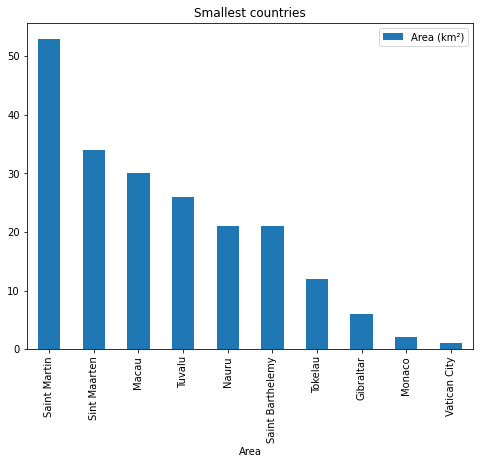

In [14]:
top_smallest.plot(kind='bar',x='Country',y='Area (km²)',figsize=(8,6))
plt.xlabel("Area")
plt.title("Smallest countries")

### Univariate Analysis

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

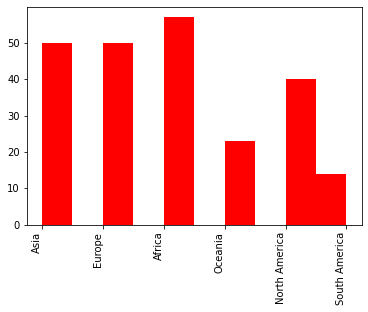

In [15]:
plt.hist(df["Continent"],color='red',bins=10)
plt.xticks(rotation = 90, ha = 'right')

### Countries with highest & lowest population

In [24]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def selected(col):
    temp = df[['Country', col]]
    temp.reset_index(inplace=True,drop=True)
    temp.sort_values(col, ascending=False, inplace=True, kind='stable')
    
    # Plot
    fig = make_subplots(rows=1, cols=2,
                    shared_yaxes=False,
                    horizontal_spacing=0.04)
    
    # Top 5
    fig.add_trace(go.Bar(x=temp['Country'].head(), 
                     y=temp[col].head(),
                     name='Top 5 (highest)', marker_color='blue',
                     ), row=1, col=1)
    
    # Bottom 5
    fig.add_trace(go.Bar(x=temp['Country'].tail(), 
                     y=temp[col].tail(),
                     name='Bottom 5 (lowest)', marker_color='green',
                     ), row=1, col=2)
    
    fig.update_xaxes(nticks=25)
    fig.update_yaxes(nticks=5)
    fig.update_layout(title='Countries with highest & lowest '+col,                   
                  titlefont_size=16)
    return fig.show()
    

In [25]:
selected('population')

### World population by Continent

In [26]:
continents = df.groupby(['Continent'],as_index=False)['population'].agg([max,sum])
continents

,max,sum
Continent,,
Africa,1118404199,7347810642
Asia,9815434171,29788655017
Europe,1141442604,5760954646
North America,2263973125,3898701206
Oceania,161054190,266845137
South America,1375289923,2756076156


Text(0.5, 1.0, 'World population by Continent')

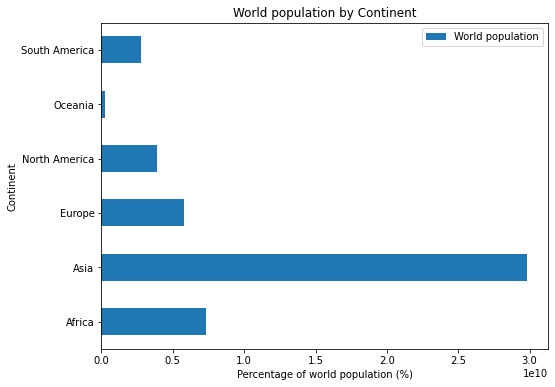

In [27]:
continents.plot(kind="barh", y='sum',figsize=(8,6),label='World population')
plt.xlabel("Percentage of world population (%)")
plt.title("World population by Continent")

([<matplotlib.patches.Wedge at 0x7fbbb687cf50>,
 [Text(0.7933226911635385, 0.7619967898128187, 'Africa'),
  Text(-0.6489509921990213, 0.8881793792494318, 'Europe'),
  Text(-1.0119773781913737, -0.43116329392576286, 'Asia'),
  Text(0.04429258293469795, -1.099107896021575, 'North America'),
  Text(0.8520655026864785, -0.6956898584366735, 'Oceania'),
  Text(1.0806265254874028, -0.20553907758142614, 'South America')],
 [Text(0.4327214679073846, 0.4156346126251738, '24.4%'),
  Text(-0.3539732684721934, 0.4844614795905991, '21.4%'),
  Text(-0.5519876608316583, -0.23517997850496153, '21.4%'),
  Text(0.024159590691653424, -0.59951339782995, '17.1%'),
  Text(0.4647630014653519, -0.3794671955109128, '9.8%'),
  Text(0.589432650265856, -0.11211222413532333, '6.0%')])

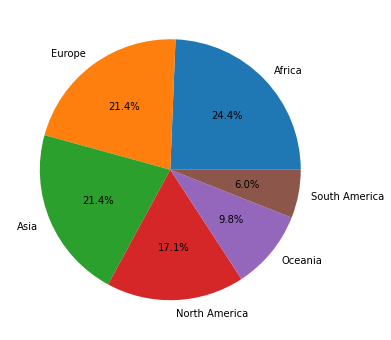

In [28]:
plt.subplots(figsize=(6,6))
plt.pie(df['Continent'].value_counts(),labels=['Africa', 'Europe', 'Asia', 'North America', 'Oceania',
       'South America'],autopct="%1.1f%%")

In [29]:
continents_area = df.groupby(['Continent'],as_index=False)['Area (km²)'].sum().sort_values(by='Area (km²)', ascending=False)

Text(0.5, 1.0, 'Area (km2) per continent')

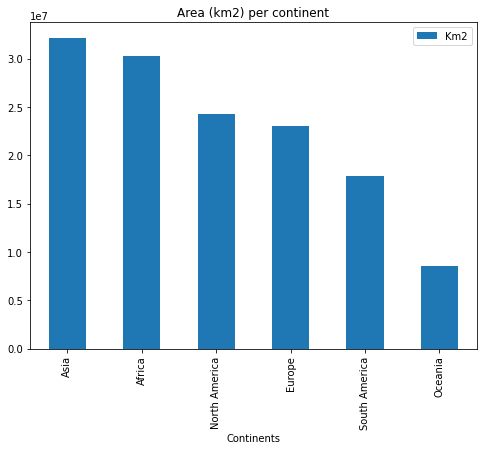

In [30]:
continents_area.plot(kind="bar", x= 'Continent', y='Area (km²)',figsize=(8,6),label='Km2')
plt.xlabel("Continents")
plt.title("Area (km2) per continent")

### Overpopulated countries

In [31]:
df.loc[:,['Country','population','Area (km²)','Density (per km²)',]].sort_values(by='Density (per km²)',ascending=False).head(10)

,Country,population,Area (km²),Density (per km²)
119,Macau,3818726,30,23172.2667
134,Monaco,257469,2,18234.5000
187,Singapore,34237537,710,8416.4634
89,Hong Kong,51025484,1104,6783.3922
76,Gibraltar,239617,6,5441.5000
15,Bahrain,7339499,765,1924.4876
123,Maldives,2630976,300,1745.9567
125,Malta,3337582,316,1687.6139
188,Sint Maarten,237872,34,1299.2647
22,Bermuda,479231,54,1188.5926


In [32]:
df['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

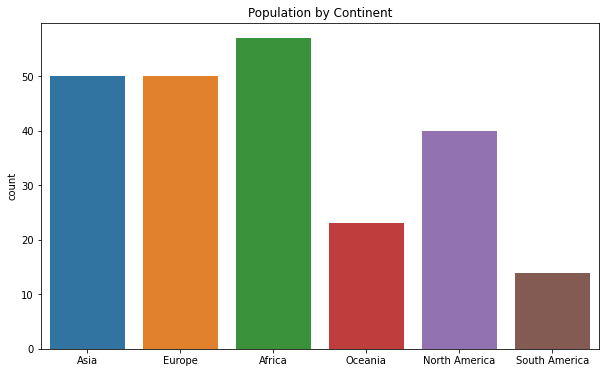

In [33]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x = df.Continent.values, data=df)
ax.set_title("Population by Continent")
plt.show()

In [34]:
df['Continent'] = df['Continent'].replace({ 'Asia':1,'Europe':2,'Africa':3,'Oceania':4,'North America':5,'South America':6})

### Bivariate Analysis

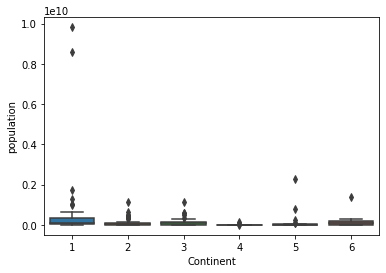

In [35]:
sns.boxplot( x="Continent", y='population', data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



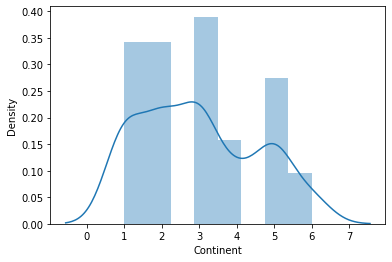

In [36]:
sns.distplot(df["Continent"])

In [37]:
df[['Continent','population']].groupby('Continent').mean()

,population
Continent,
1,5.957731e+08
2,1.152191e+08
3,1.289090e+08
4,1.160196e+07
5,9.746753e+07
6,1.968626e+08


### Multivariate Analysis

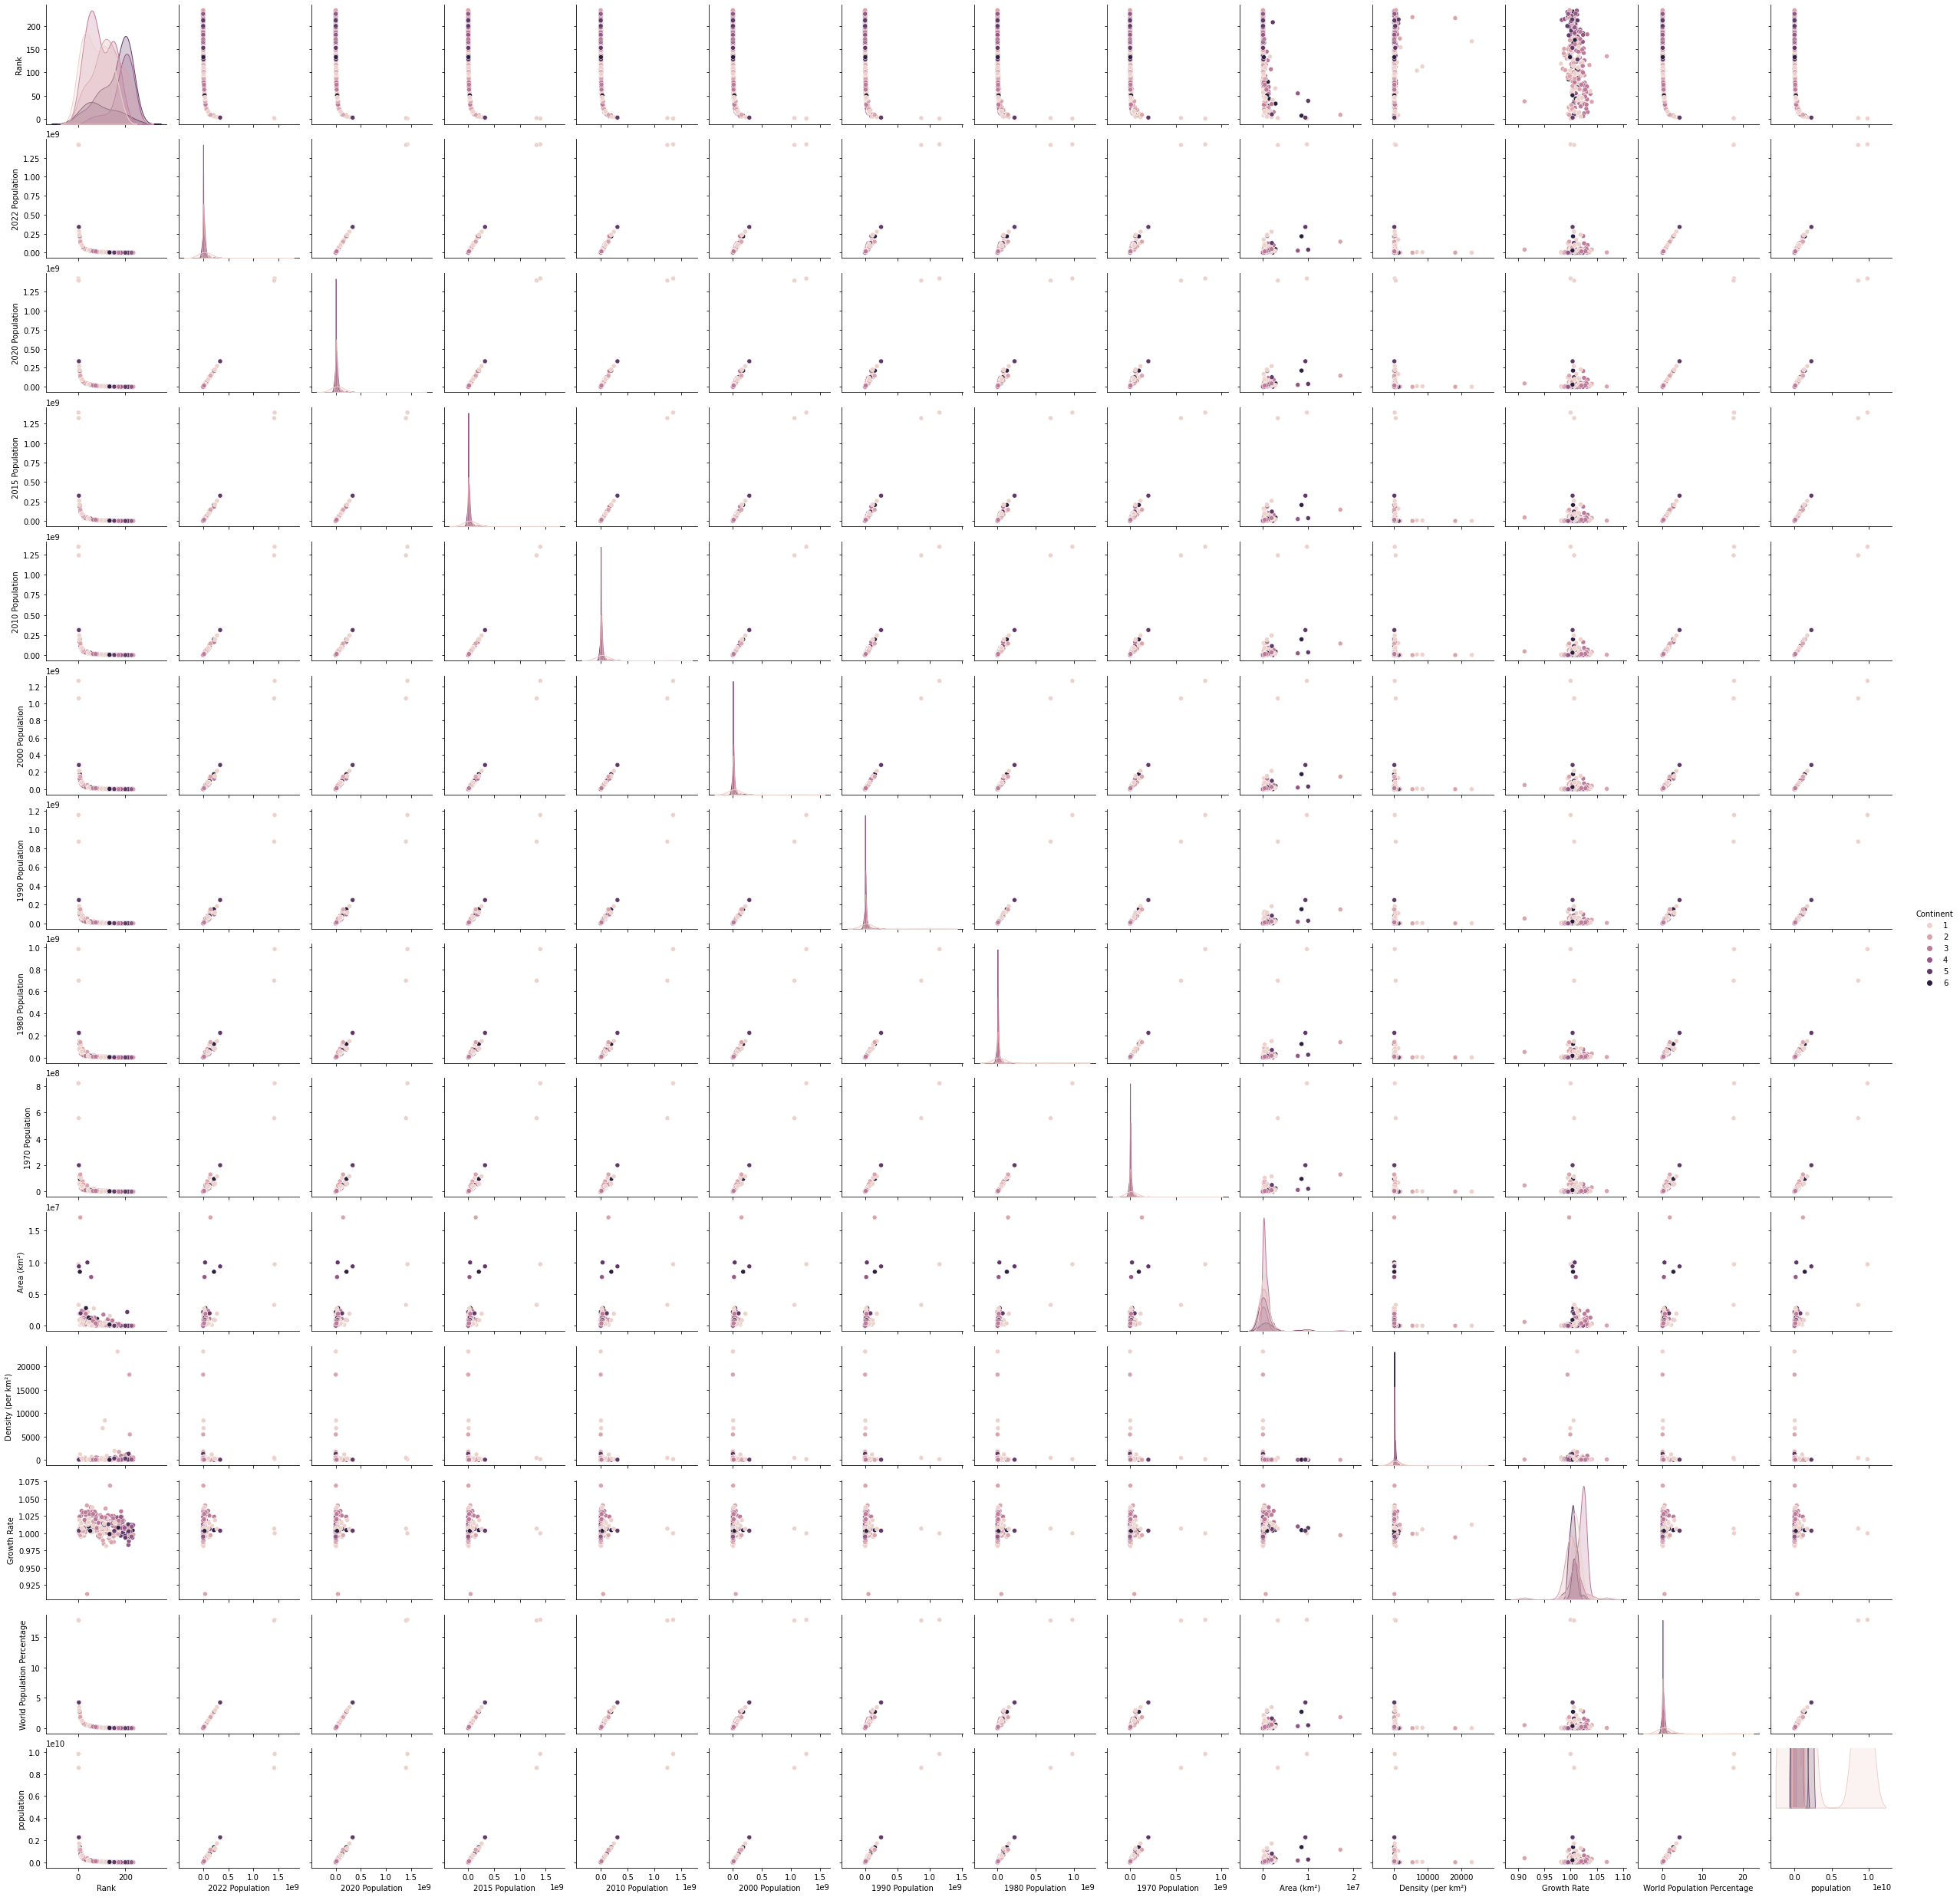

In [38]:
sns.pairplot(df, hue='Continent')

### Distributions of the variables/features.

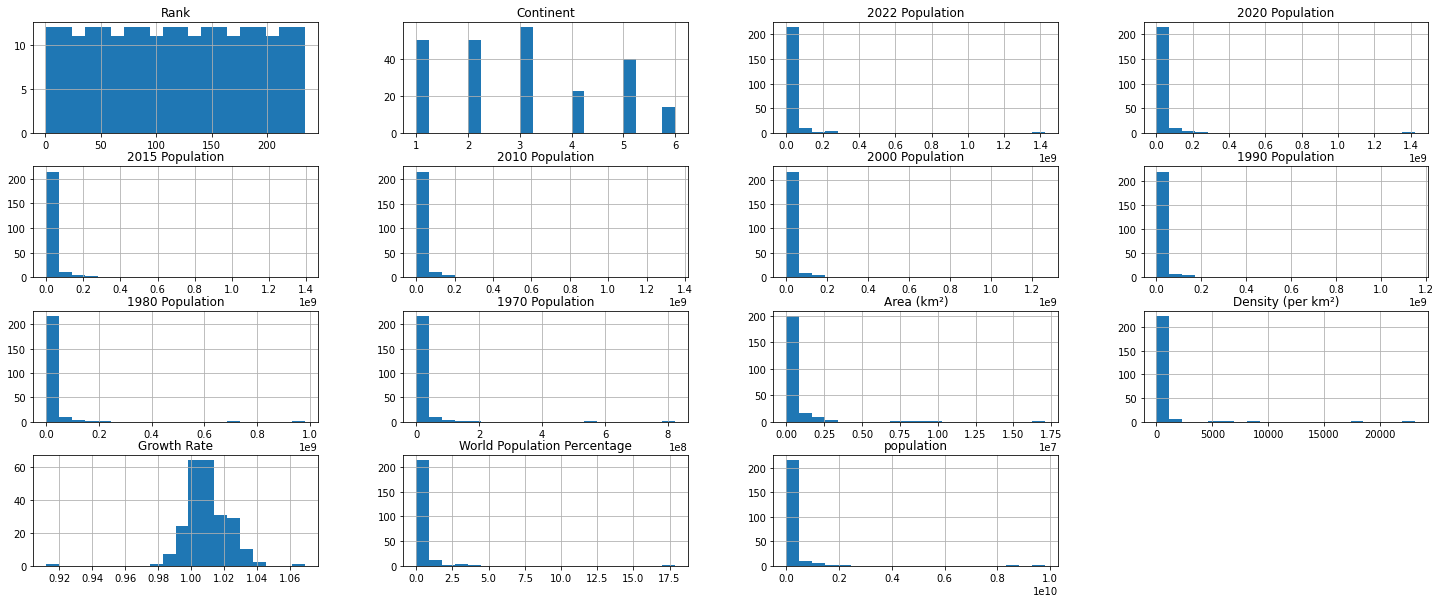

In [39]:
df.hist(figsize=(25,10),bins=20)
plt.show()

##### The Growth Rate of the population in the data is normally distributed 

### Correlation – By Heatmap the relationship between the features.

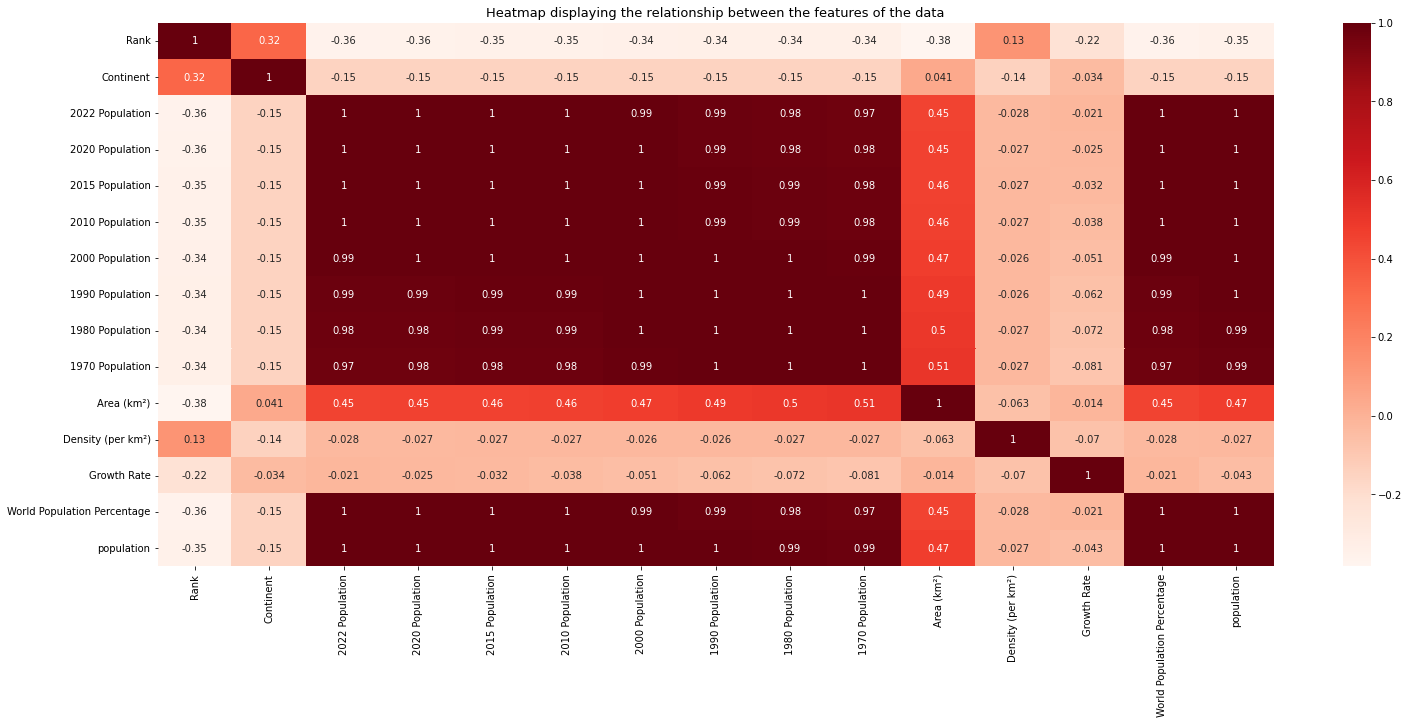

In [40]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()
